<a href="https://www.kaggle.com/code/mikedelong/udes-dataset-2?scriptVersionId=140895507" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/skills-analysis-dataset-internships/stages_df.csv', index_col=['IDOffre'], low_memory=False,
                parse_dates=['DateDebut', 'DateFin'])
# we have some weird noise in our medical test required column
allowed = {'Oui', 'No', 'Non', 'Yes'} 
df = df[df['TestMedicalRequis'].isin(allowed)]
# get the numeric sector where available
df['sector'] = df['SecteurSimplifie'].apply(lambda x: x if not isinstance(x, str) else int(x.split('-')[0]))
# get the hourly wage where we can
df['hourly'] = df['SalaireParHeure'].apply(lambda x: np.nan if not isinstance(x, str) or not str(x).isnumeric() else float(x) )
df.head()

,NomOrganization,Website,SecteurSimplifie,AdresseSite,VilleSite,ProvinceSite,CodePostalSite,PaysSite,Trimestre,DateDebut,...,NombreDePosteOfferts,SalaireParHeure,NombreHeuresParSemaine,NatureOrganisation,FonctionsStagiaire,EnvironnementTravail,ExigencesParticulieres,TestMedicalRequis,sector,hourly
IDOffre,,,,,,,,,,,,,,,,,,,,,
93671,Rio Tinto,www.Riotinto.com,3310 - Fabrication - Première transformation d...,"1190, avenue des Canadiens-de-Montréal",Montréal,Québec,H3C 1B3,Canada,2022 - Automne,2022-09-05,...,1,À déterminer,40.0,Rio Tinto nommé l?un des 100 meilleurs employe...,Au sujet du poste \nNous offrons des opportuni...,À propos de Rio Tinto\n\nÀ l?origine de chaque...,Votre contribution\nAu moins une année complét...,Oui,3310.0,NaN
93667,Sym Communications inc.,NaN,5416 - Services de conseils en gestion et de c...,"24, Mont-Royal Ouest",Montréal,Québec,H2T2S2,Canada,2022 - Automne,2022-09-06,...,1,À déterminer,35.0,Cabinet de traduction,Le stagiaire devra traduire divers documents é...,Espace de travail ouvert avec une cuisine comp...,"En raison de la pandémie, on priviligéra une f...",Non,5416.0,NaN
93666,Omnimed,https://www.omnimed.com/,5415 - Conception de systèmes informatiques et...,"160, rue Pope",Cookshire-Eaton,Québec,J0B 1M0,Canada,2022 - Automne,2022-05-02,...,1,19,40.0,<strong>L'entreprise</strong>\n\n<br>\nNous so...,- Prendre en charge les comptes clients\n\n<br...,<strong>Ce que nous t'offrons&nbsp:</strong>\n...,<strong>Nous recherchons une personne avec&nbs...,Non,5415.0,19.0
93665,EnerOptim inc.,http://eneroptim.com/,5416 - Services de conseils en gestion et de c...,"1400, rue Marie-Victorin",Saint-Bruno-de-Montarville,Québec,J3V 6B9,Canada,2022 - Automne,2022-09-05,...,1,À déterminer,40.0,EnerOptim inc. une jeune entreprise dynamique ...,Sous la supervision du directeur de service ou...,-&nbsp:&nbsp:&nbsp:&nbsp:&nbsp:&nbsp:&nbsp:&nb...,-&nbsp:&nbsp:&nbsp:&nbsp:&nbsp:&nbsp:&nbsp:&nb...,Non,5416.0,NaN
93664,Laboratoires Abbott,www.abbott.com,"3112 - Fabrication - Aliments, boissons et tabac","75, boulevard Pierre-Roux Est",Victoriaville,Québec,G6P 6S9,Canada,2022 - Automne,2022-09-06,...,1,À déterminer,40.0,Abbott est un chef de file mondial dans le dom...,Le stagiaire en comptabilité relèvera du Contr...,1. Environnement de travail respectueux et axé...,<ul>\n \n \n\t\n \n <li>Être enregistré dans u...,Non,3112.0,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44268 entries, 93671 to 6813
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   NomOrganization               44268 non-null  object        
 1   Website                       37623 non-null  object        
 2   SecteurSimplifie              44265 non-null  object        
 3   AdresseSite                   44268 non-null  object        
 4   VilleSite                     44268 non-null  object        
 5   ProvinceSite                  44268 non-null  object        
 6   CodePostalSite                44268 non-null  object        
 7   PaysSite                      44268 non-null  object        
 8   Trimestre                     44268 non-null  object        
 9   DateDebut                     19601 non-null  datetime64[ns]
 10  DateFin                       19420 non-null  datetime64[ns]
 11  TitreOffre               

In [3]:
df.nunique()

NomOrganization                  4713
Website                          3360
SecteurSimplifie                   69
AdresseSite                      5474
VilleSite                         743
ProvinceSite                       30
CodePostalSite                   4481
PaysSite                           42
Trimestre                          16
DateDebut                         300
DateFin                           397
TitreOffre                      20981
LieuDuStageInscritDansOffre      4760
Teletravail                         4
PasseportVaccinalObligatoire        6
NombreDePosteOfferts               38
SalaireParHeure                    64
NombreHeuresParSemaine             53
NatureOrganisation              19050
FonctionsStagiaire              26244
EnvironnementTravail            20848
ExigencesParticulieres          24035
TestMedicalRequis                   4
sector                             58
hourly                             63
dtype: int64

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '(2023.0, 6.0)'),
  Text(0.0, 0, '(2020.0, 4.0)'),
  Text(5.0, 0, '(2020.0, 10.0)'),
  Text(10.0, 0, '(2021.0, 3.0)'),
  Text(15.0, 0, '(2021.0, 8.0)'),
  Text(20.0, 0, '(2022.0, 1.0)'),
  Text(25.0, 0, '(2022.0, 6.0)'),
  Text(30.0, 0, '(2022.0, 11.0)'),
  Text(35.0, 0, '(2023.0, 5.0)')])

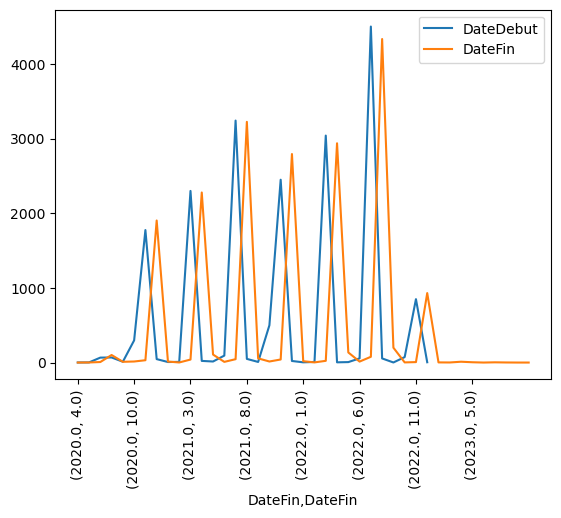

In [4]:
from matplotlib.pyplot import xticks
df.groupby([df['DateDebut'].dt.year, df['DateDebut'].dt.month]).count()['DateDebut'].plot(kind='line', legend=True)
df.groupby([df['DateFin'].dt.year, df['DateFin'].dt.month]).count()['DateFin'].plot(kind='line', legend=True)
xticks(rotation=90)

This plot is ugly but it tells us a couple of things: 1. Interns arrive three times a year and typically work for three months. 2. there are some exceptions, but not many.

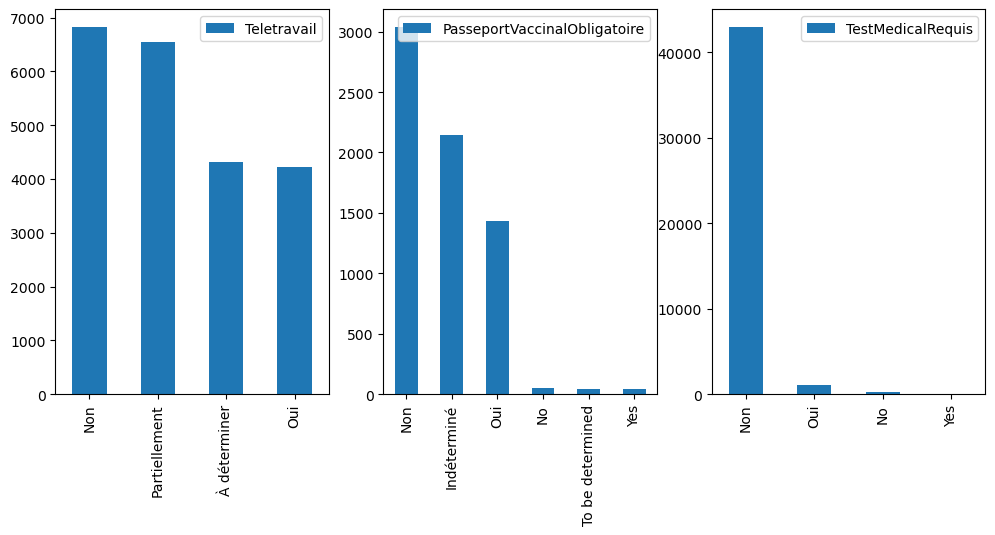

In [5]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(12, 5), ncols=3)
for index, column in enumerate([key for key, value in df.nunique().items() if value < 10]):
    df[column].value_counts().plot(ax=ax[index], kind='bar', legend=True)

Our hourly wage data is noisy. There's a Gaussian in there somewhere, but it's obscured by several things: missing data, outliers, and (probably) the mixture of two (or more?) distributions of hourly wages.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='hourly'>

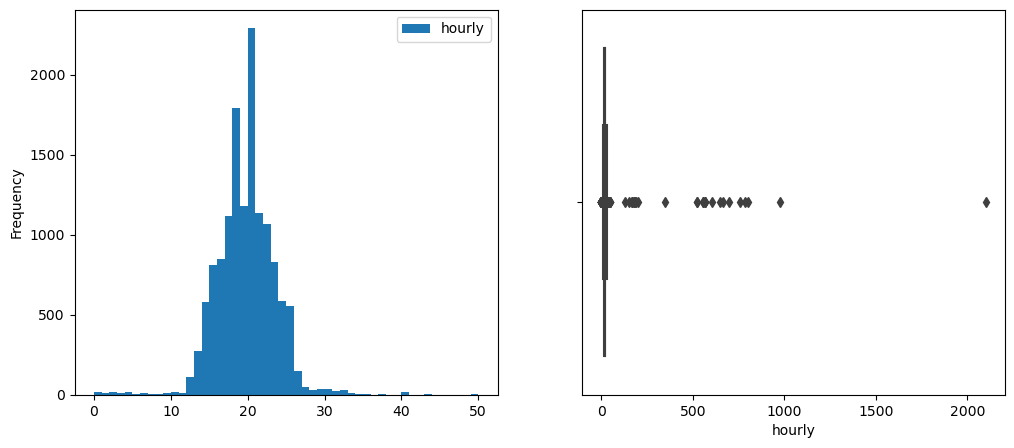

In [6]:
from seaborn import boxplot
_, ax = subplots(figsize=(12, 5), ncols=2)
df[df['hourly'] < 100]['hourly'].plot.hist(ax=ax[0], bins=50, legend=True)
boxplot(ax=ax[1], data=df, x='hourly')